In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding

from tensorflow.keras.models import Model

In [3]:
# you can import this from kaggle

In [8]:
#data processing

In [14]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [15]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [17]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# rename columns to something better
df.columns = ['labels', 'data']

In [20]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df["label_numerics"]= df["labels"].map({"ham":0, "spam":1})
Y = df["label_numerics"].values

In [22]:
df

,labels,data,label_numerics
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [23]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [ ]:
#TRAIN TEST SPLIT

In [24]:
df_train, df_test,Ytrain, Ytest= train_test_split(df['data'], Y, test_size=0.33)

In [27]:
max_words=20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train)

In [28]:
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test= tokenizer.texts_to_sequences(df_test)

In [29]:
sequences_train

[[37, 184, 4, 1113, 3425, 2306, 26, 3426, 6, 36, 2, 196],
 [462, 446, 7, 3427, 171, 104, 33, 3428, 3429, 14, 56, 131],
 [575, 293, 124, 21, 3],
 [66, 4, 759, 103, 14, 33, 3],
 [1, 3430, 35, 1794, 48],
 [1459,
  15,
  542,
  386,
  341,
  8,
  24,
  74,
  481,
  139,
  694,
  5,
  830,
  127,
  66,
  74,
  481,
  37,
  83,
  695,
  5,
  258,
  218,
  1272,
  2307],
 [51,
  197,
  24,
  2,
  647,
  41,
  219,
  59,
  259,
  3431,
  9,
  5,
  171,
  341,
  648,
  8,
  280,
  15,
  3,
  519,
  26,
  1273,
  11,
  19,
  3,
  463,
  2,
  647],
 [1795, 19, 107, 5, 3432, 1460, 2308, 1461],
 [604, 69, 11, 41, 250, 3433],
 [273, 1274, 39, 649, 201, 1, 108, 1, 16, 605, 2, 185, 39, 1462, 19, 985, 141],
 [30, 2309, 7, 3434, 986, 1796],
 [54, 59, 3, 987, 15, 576],
 [84,
  202,
  169,
  220,
  6,
  3435,
  831,
  11,
  650,
  3436,
  251,
  2310,
  407,
  39,
  8,
  4,
  3437,
  1275,
  38,
  34,
  3,
  1276,
  3,
  36,
  1797,
  2311,
  387,
  119,
  1463,
  228,
  2312,
  760,
  158,
  1798],
 [54,

In [30]:
sequences_test

[[38, 1, 62, 24, 431, 24, 98, 1384, 9, 10, 759],
 [5, 566, 853, 31, 45, 46],
 [6657,
  95,
  28,
  11,
  4,
  2984,
  95,
  1011,
  10,
  373,
  1292,
  2,
  1490,
  95,
  91,
  8,
  99,
  373],
 [34, 1, 189, 3, 28, 39, 1, 71, 3, 9, 5, 290, 83, 6679],
 [100,
  3,
  52,
  39,
  8,
  5,
  927,
  59,
  92,
  115,
  142,
  57,
  19,
  22,
  185,
  1,
  15,
  54,
  92,
  296,
  7,
  120,
  5,
  65,
  221,
  26,
  34,
  187,
  1744,
  5,
  65,
  221,
  22,
  19,
  40,
  27,
  32,
  191,
  66,
  425],
 [1, 62, 371, 396, 1, 71, 2, 728, 53, 13],
 [2, 3, 56, 471, 51, 5, 1396, 44, 13, 965],
 [7, 44, 3, 29, 28, 19, 403],
 [48,
  82,
  1031,
  6716,
  1,
  165,
  1383,
  61,
  92,
  147,
  389,
  585,
  20,
  283,
  22,
  1,
  2540],
 [122, 1, 326, 24, 63, 61],
 [179, 1, 154, 32, 562, 2, 77, 69, 3, 41, 30, 304, 2, 163, 43],
 [1, 274, 36, 5, 927, 300, 15, 19, 127],
 [8, 19, 1252, 44, 3, 2478, 230, 258],
 [218, 911, 133, 4879, 122, 103, 174, 1723, 772, 4880],
 [21, 3, 307, 2, 65, 12, 293],
 [187, 82,

In [19]:
tokenizer.word_docs

defaultdict(int,
            {'watching': 25,
             'movie': 16,
             'vijay': 3,
             'too': 71,
             'surya': 1,
             '6': 35,
             'pokkiri': 1,
             'me': 459,
             'pm': 16,
             'only': 144,
             'after': 63,
             'she': 70,
             'we': 197,
             'got': 141,
             'here': 84,
             'lol': 48,
             'a': 785,
             's': 39,
             'divorce': 1,
             'cant': 47,
             'vava': 2,
             'you': 1018,
             'my': 419,
             'eyes': 7,
             'i': 1148,
             'even': 44,
             'close': 10,
             'in': 554,
             'are': 306,
             'umma': 5,
             'playing': 4,
             'd': 42,
             'our': 95,
             'reply': 89,
             '25': 6,
             '440': 2,
             'to': 1110,
             'nat27081980': 2,
             'ac': 8,
             'stop'

In [33]:
V= len(tokenizer.word_docs) # NO OF UNIQUE TOKENS
V

7175

In [36]:
#Pad TRAIN DATA sequences with max length T 

In [34]:
data_train = pad_sequences(sequences_train)

In [35]:
data_train

array([[   0,    0,    0, ..., 1790,  492, 3436],
       [   0,    0,    0, ...,   91,  202,  109],
       [   0,    0,    0, ..., 1462, 1107,  112],
       ...,
       [   0,    0,    0, ...,  478, 1016, 2290],
       [   0,    0,    0, ...,  229,   53,  882],
       [   0,    0,    0, ...,   36, 3425,  195]], dtype=int32)

In [34]:
data_train.shape

(3733, 162)

In [39]:
T= data_train.shape[1]

In [40]:
T

189

In [41]:
#Pad TEST DATA sequences with max length T

In [42]:
data_test = pad_sequences(sequences_test, maxlen=T)


In [43]:
data_test

array([[   0,    0,    0, ...,    9,   10,  759],
       [   0,    0,    0, ...,   31,   45,   46],
       [   0,    0,    0, ...,    8,   99,  373],
       ...,
       [   0,    0,    0, ..., 1697,  278,    1],
       [   0,    0,    0, ...,  137,    6,   61],
       [   0,    0,    0, ...,  464,   93,  140]], dtype=int32)

In [44]:
data_train.shape

(3733, 189)

In [45]:
data_test.shape

(1839, 189)

In [46]:
data_train.shape[1]

189

In [39]:
V= len(len(tokenizer.word_docs))
T = data_train.shape[1] #features

In [ ]:
 #TF SHAPES
#   2000(word_embeddings) x D(just choose dimensions)x  T 162(features)

In [59]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i) #return word vectors 
x = LSTM(M, return_sequences=True)(x) 
x = GlobalMaxPooling1D()(x)  #long term dependancies
x = Dense(1, activation='sigmoid')(x) #binary

model = Model(i, x)


In [47]:
#Understand whats happening at each step

In [58]:
Embedding(V + 1, D)(i)

<tf.Tensor 'embedding_4/embedding_lookup/Identity_1:0' shape=(None, 162, 20) dtype=float32>

In [56]:
Embedding(len(tokenizer.word_docs) + 1 , 20)(Input(shape=(162,)))

<tf.Tensor 'embedding_2/embedding_lookup/Identity_1:0' shape=(None, 162, 20) dtype=float32>

In [79]:
x1= Embedding(V + 1, D)(i) #return word vectors n  x t

In [ ]:
#LSTM LAYER BREAKDOWN

In [57]:
LSTM(15,return_sequences=True)(x1) 

<tf.Tensor 'lstm_1/PartitionedCall:1' shape=(None, 189, 15) dtype=float32>

In [80]:
x2=LSTM(15,return_sequences=True)(x1) 

In [62]:
#GLOBAL MAX POOLING ... just more pads

In [60]:
GlobalMaxPooling1D()(x2)

<tf.Tensor 'global_max_pooling1d_2/Max:0' shape=(None, 15) dtype=float32>

In [81]:
x3=GlobalMaxPooling1D()(x2)

In [65]:
#OUTPUT LAYER DENSE

In [66]:
Dense(1, activation='sigmoid')(x3) #binary so its 1

<tf.Tensor 'dense_2/Sigmoid:0' shape=(None, 1) dtype=float32>

In [82]:
x4=Dense(1, activation='sigmoid')(x3)

In [68]:
x4

<tf.Tensor 'dense_3/Sigmoid:0' shape=(None, 1) dtype=float32>

In [ ]:
#CREATE THE MODEL

In [76]:
i = Input(shape=(T,))

In [83]:
model = Model(i, x4)

In [84]:
#COMPILE THE MODEL

In [86]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 13s 113ms/step - loss: 0.4760 - accuracy: 0.8535 - val_loss: 0.4107 - val_accuracy: 0.8532
Epoch 2/10
117/117 [==============================] - 12s 102ms/step - loss: 0.3337 - accuracy: 0.8722 - val_loss: 0.3367 - val_accuracy: 0.8532
Epoch 3/10
117/117 [==============================] - 12s 104ms/step - loss: 0.2902 - accuracy: 0.8722 - val_loss: 0.3072 - val_accuracy: 0.8532
Epoch 4/10
117/117 [==============================] - 12s 102ms/step - loss: 0.2553 - accuracy: 0.8722 - val_loss: 0.2649 - val_accuracy: 0.8532
Epoch 5/10
117/117 [==============================] - 12s 104ms/step - loss: 0.2120 - accuracy: 0.8722 - val_loss: 0.2280 - val_accuracy: 0.8532
Epoch 6/10
117/117 [==============================] - 12s 102ms/step - loss: 0.1785 - accuracy: 0.8738 - val_loss: 0.1975 - val_accuracy: 0.9413
Epoch 7/10
117/117 [==============================] - 12s 104ms/step - loss: 0.1548 - accuracy: 0.9638 - val_los

In [87]:
import matplotlib.pyplot as plt

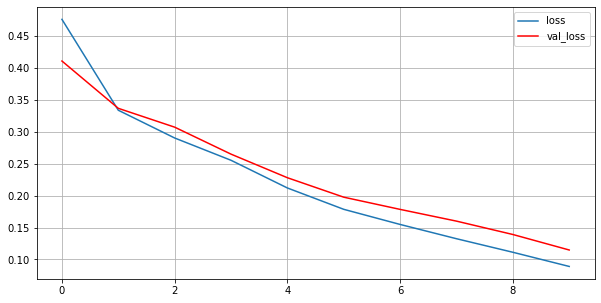

In [95]:
plt.figure(figsize=(10,5))


plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss' , color="red")
plt.grid()
plt.legend()

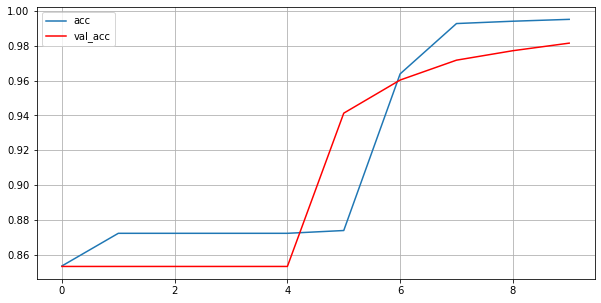

In [96]:
plt.figure(figsize=(10,5))

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc',color="red")
plt.grid()
plt.legend()

In [97]:
#LETS PREDICT IT .. FUN PART

In [104]:
#Reset the index in test data

In [98]:
df_test

2726       No i am not having not any movies in my laptop
1804                        The bus leaves at  &lt;#&gt; 
3034    Raji..pls do me a favour. Pls convey my Birthd...
2380    If i let you do this, i want you in the house ...
977     Dont hesitate. You know this is the second tim...
                              ...                        
2529    Can you just come in for a sec? There's somebo...
1496    I'm always on yahoo messenger now. Just send t...
1885    I think asking for a gym is the excuse for laz...
3915                                        Ok. C u then.
516     Boltblue tones for 150p Reply POLY# or MONO# e...
Name: data, Length: 1839, dtype: object

In [99]:
df_test2=df_test.reset_index()

In [100]:
df_test2=df_test2.drop(columns=["index"])

In [101]:
df_test2.shape

(1839, 1)

In [105]:
#exploration

In [117]:
df_test2.loc[1838]

data    Boltblue tones for 150p Reply POLY# or MONO# e...
Name: 1838, dtype: object

In [123]:
df_test2.loc[1838][0]

'Boltblue tones for 150p Reply POLY# or MONO# eg POLY3 1. Cha Cha Slide 2. Yeah 3. Slow Jamz 6. Toxic 8. Come With Me or STOP 4 more tones txt MORE'

In [120]:
Ytest.shape

(1839,)

In [113]:
Ytest[1838]

1

In [140]:
#indexes for all the spam

In [132]:
np.where(Ytest==1)

(array([  28,   40,   43,   53,   76,   80,   82,   83,   84,   91,   92,
          96,  109,  114,  123,  126,  129,  140,  141,  154,  159,  161,
         170,  172,  183,  186,  225,  233,  234,  240,  255,  258,  262,
         291,  300,  311,  337,  338,  346,  353,  367,  373,  374,  381,
         384,  394,  398,  406,  418,  422,  426,  430,  431,  435,  437,
         440,  452,  455,  457,  488,  489,  494,  496,  527,  528,  533,
         537,  539,  542,  552,  560,  571,  573,  575,  576,  586,  587,
         593,  598,  600,  606,  607,  623,  629,  632,  636,  637,  641,
         643,  645,  651,  660,  667,  672,  673,  674,  690,  704,  714,
         729,  731,  739,  744,  752,  762,  770,  772,  777,  785,  790,
         798,  804,  820,  823,  830,  841,  845,  846,  849,  852,  853,
         864,  876,  880,  887,  891,  915,  922,  933,  934,  943,  945,
         948,  949,  954,  956,  959,  962,  966,  971,  974,  976,  997,
        1001, 1006, 1011, 1014, 1027, 

In [130]:
Ytest[1345]

0

In [89]:
k.shape

(18, 1)

In [284]:
df_test2.loc[1]

data    FREE for 1st week! No1 Nokia tone 4 ur mobile ...
Name: 1, dtype: object

In [127]:
test_token=pad_sequences(tokenizer.texts_to_sequences([df_test2.loc[1838][0]]),maxlen=162)

In [128]:
model.predict(test_token)

array([[0.5492963]], dtype=float32)

In [ ]:
#LETS TRY ANOTHER

In [142]:
[df_test2.loc[1710][0]]

['URGENT! Your Mobile number has been awarded with a å£2000 prize GUARANTEED. Call 09061790121 from land line. Claim 3030. Valid 12hrs only 150ppm']

In [143]:
test_token=pad_sequences(tokenizer.texts_to_sequences([df_test2.loc[1710][0]]),maxlen=162)

In [144]:
model.predict(test_token)

array([[0.75070894]], dtype=float32)

In [145]:
# LETS TRY WITH OUT OWN TEXT

In [321]:
test="Of course we’ve knocked down our prices for Boxing Week! Boxing glove Save big on games, accessories, and more: https://bit.ly/3mIvsRT"

In [322]:
test_Series=pd.Series(test)

In [323]:
k=pad_sequences(tokenizer.texts_to_sequences(test_Series),maxlen=162)

In [324]:
model.predict(k)

array([[0.00298834]], dtype=float32)

In [277]:
k

array([[  0,   0,   0, ...,   0,   0, 818],
       [  0,   0,   0, ...,   0,   0,  78],
       [  0,   0,   0, ...,   0,   0, 160],
       ...,
       [  0,   0,   0, ...,   0,   0, 216],
       [  0,   0,   0, ...,   0,   0, 845],
       [  0,   0,   0, ...,   0,   0,  80]], dtype=int32)